<a href="https://colab.research.google.com/github/kbridge14/boston_playground/blob/main/Assignment4_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

In [ ]:
# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

In [ ]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 30


In [ ]:
# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

In [ ]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import seaborn as sns
import math

# modeling routines from Scikit Learn packages
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree

from math import sqrt  # for root mean-squared error calculation

# Import tools needed for visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import graphviz
import pydot



%matplotlib inline   
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
boston_input = pd.read_csv('gdrive/My Drive/Colab Notebooks/Assignment4-project2/boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
0       Nahant  0.00632  18.0   2.31     0  ...    1  296     15.3   4.98  24.0
1   Swampscott  0.02731   0.0   7.07     0  ...    2  242     17.8   9.14  21.6
2   Swanpscott  0.02729   0.0   7.07     0  ...    2  242     17.8   4.03  34.7
3   Marblehead  0.03237   0.0   2.18     0  ...    3  222     18.7   2.94  33.4
4   Marblehead  0.06905   0.0   2.18     0  ...    3  222     18.7   5.33  36.2

[5 rows x 14 columns]
    neighborhood     crim   zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
501     Winthrop  0.06263  0.0  11.93     0  ...    1  273     21.0   9.67  22.4
502     Winthrop  0.04527  0.0  11.93     0  ...    1  273     21.0   9.08  20.6
503     Winthrop  0.06076  0.0  11.93     0  ...    1  273     21.0   5.64  23.9
504     Winthrop  0.10959  0.0  11.93     0  ...    1  273     21.0   6.48  22.0
505     Winthrop  0.04741  0.0  11.93     0  .

In [ ]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB
None


In [ ]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info()) 


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


**EDA and Data Preparation**

In [ ]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())



Descriptive statistics of the boston DataFrame:
             crim          zn       indus  ...     ptratio       lstat          mv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...   18.455534   12.653063   22.528854
std      8.601545   23.322453    6.860353  ...    2.164946    7.141062    9.182176
min      0.006320    0.000000    0.460000  ...   12.600000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...   17.400000    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...   19.050000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...   20.200000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...   22.000000   37.970000   50.000000

[8 rows x 13 columns]


In [ ]:
boston.skew(axis=0)

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rooms      0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
lstat      0.906460
mv         1.110912
dtype: float64

In [ ]:
boston.kurtosis(axis=0)

crim       37.130509
zn          4.031510
indus      -1.233540
chas        9.638264
nox        -0.064667
rooms       1.891500
age        -0.967716
dis         0.487941
rad        -0.867232
tax        -1.142408
ptratio    -0.285091
lstat       0.493240
mv          1.516783
dtype: float64

In [ ]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [ ]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [ ]:
#standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [ ]:

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

In [ ]:

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


In [ ]:
# Convert prelim_model_data to a dataframe
df = pd.DataFrame(prelim_model_data,index=boston.index,columns=boston.columns)
df['log_mv'] = np.log(df['mv'])
df

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,log_mv
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,1.605430
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,2.212660
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,1.393766
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,1.078410
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,1.673351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,2.269028
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,2.206074
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,1.729884
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,1.868721


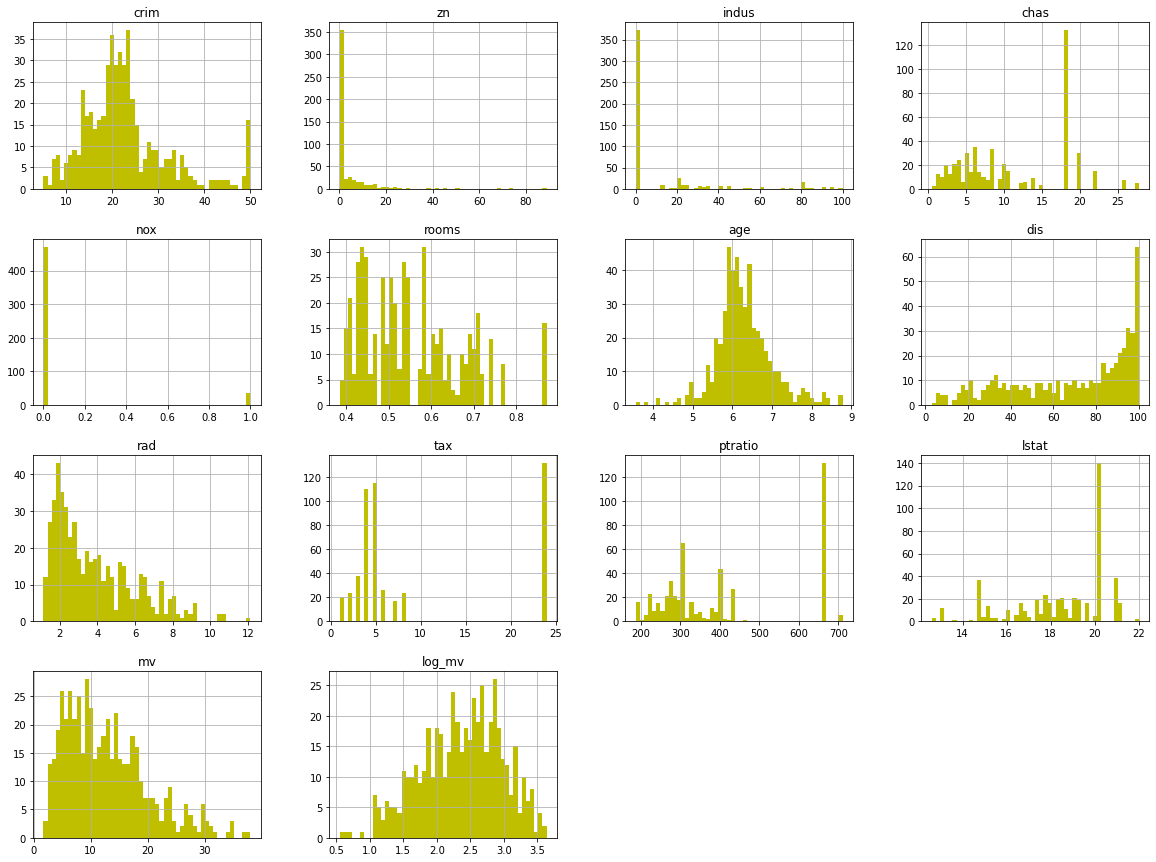

In [ ]:
# EDA on the boston housing study data
df.hist(bins=50, figsize=(20,15),color='y')
plt.show()

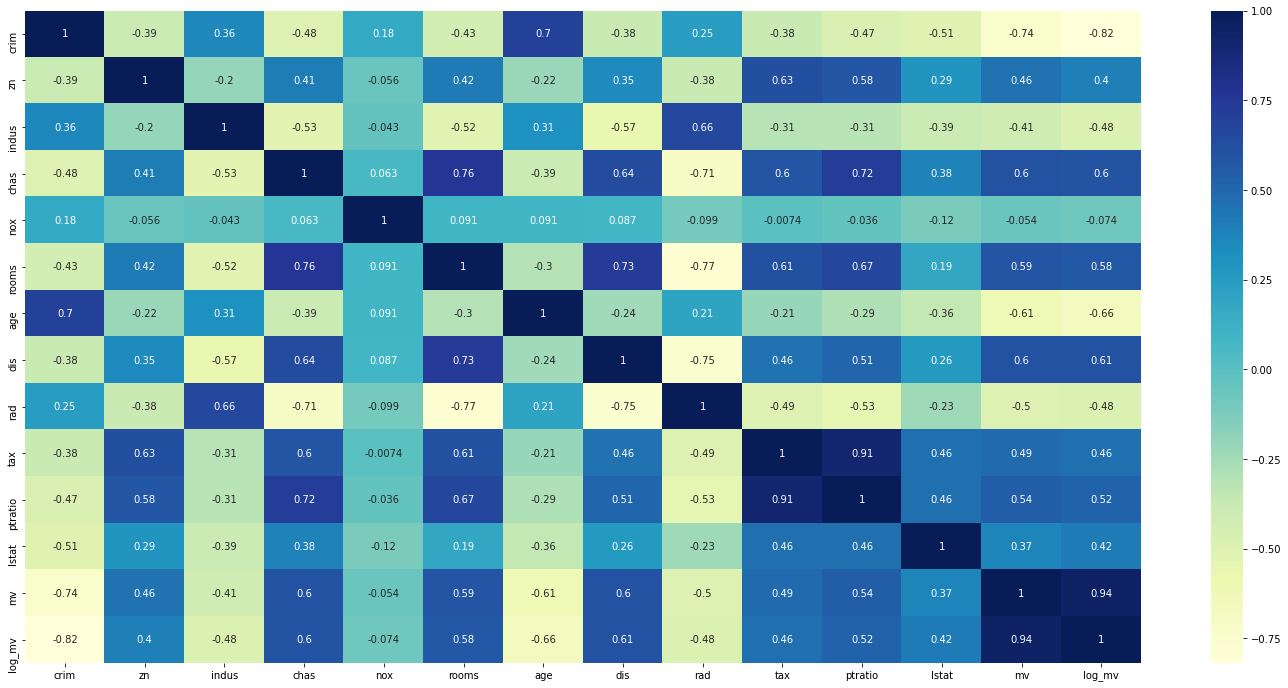

In [ ]:
# Heatmap based on correlations among the variables
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu", )

Text(0.5, 1.0, 'log_mv')

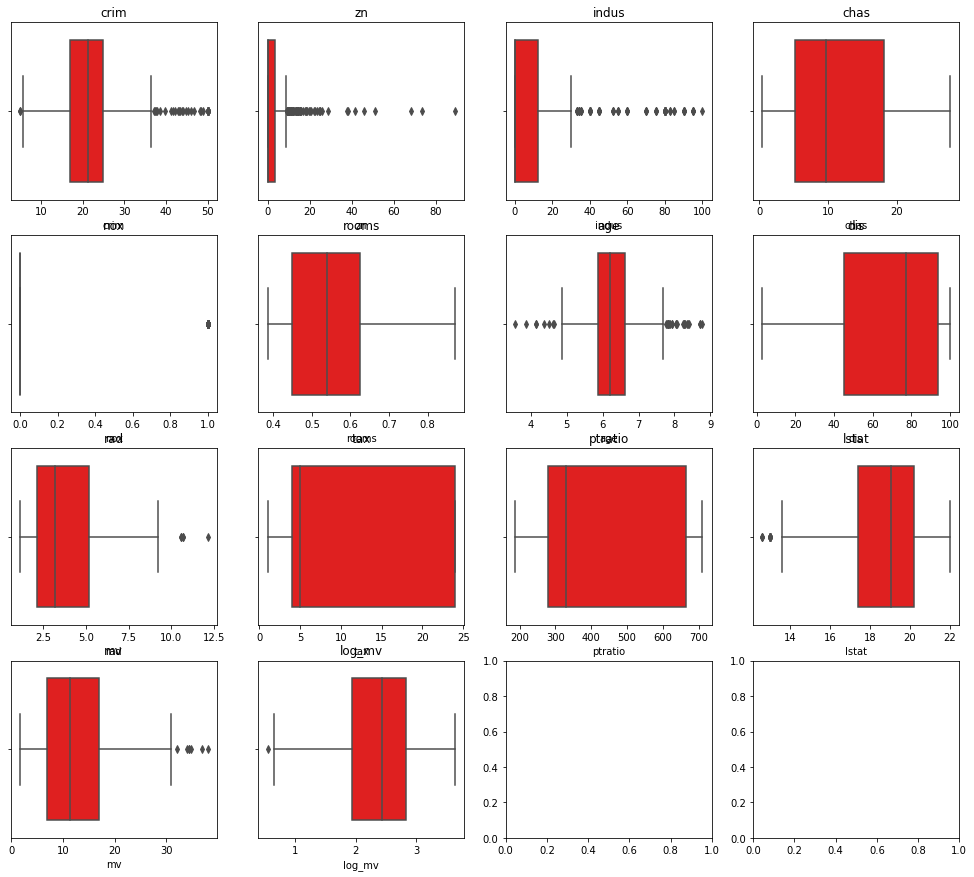

In [ ]:
f, axes = plt.subplots(nrows=4,ncols=4,figsize=(17,15))

a0 = sns.boxplot(x='crim',ax=axes[0,0],color = 'r',data=df)
a0.set_title('crim')
a1 = sns.boxplot(x='zn',ax=axes[0,1],color = 'r',data=df)
a1.set_title('zn')
a2 = sns.boxplot(x='indus',ax=axes[0,2],color = 'r',data=df)
a2.set_title('indus')
a3 = sns.boxplot(x='chas',ax=axes[0,3],color = 'r',data=df)
a3.set_title('chas')
a4 = sns.boxplot(x='nox',ax=axes[1,0],color = 'r',data=df)
a4.set_title('nox')
a5 = sns.boxplot(x='rooms',ax=axes[1,1],color = 'r',data=df)
a5.set_title('rooms')
a6 = sns.boxplot(x='age',ax=axes[1,2],color = 'r',data=df)
a6.set_title('age')
a7 = sns.boxplot(x='dis',ax=axes[1,3],color = 'r',data=df)
a7.set_title('dis')
a8 = sns.boxplot(x='rad',ax=axes[2,0],color = 'r',data=df)
a8.set_title('rad')
a9 = sns.boxplot(x='tax',ax=axes[2,1],color = 'r',data=df)
a9.set_title('tax')
a10 = sns.boxplot(x='ptratio',ax=axes[2,2],color = 'r',data=df)
a10.set_title('ptratio')
a11 = sns.boxplot(x='lstat',ax=axes[2,3],color = 'r',data=df)
a11.set_title('lstat')
a12 = sns.boxplot(x='mv',ax=axes[3,0],color = 'r',data=df)
a12.set_title('mv')
a13 = sns.boxplot(x='log_mv',ax=axes[3,1],color = 'r',data=df)
a13.set_title('log_mv')

Text(0.5, 1.0, 'lstat')

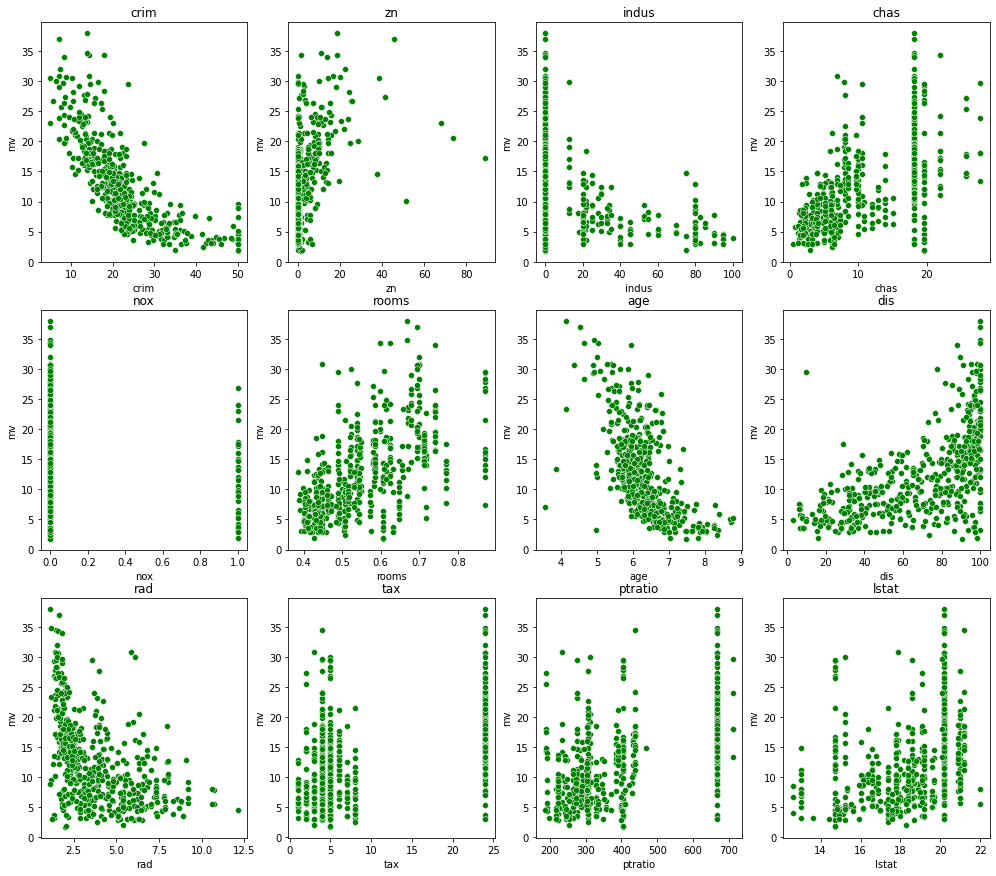

In [ ]:
f, axes = plt.subplots(nrows=3,ncols=4,figsize=(17,15))

a0 = sns.scatterplot(x='crim', y='mv',ax=axes[0,0],color = 'g',data=df)
a0.set_title('crim')
a1 = sns.scatterplot(x='zn', y='mv',ax=axes[0,1],color = 'g',data=df)
a1.set_title('zn')
a2 = sns.scatterplot(x='indus', y='mv',ax=axes[0,2],color = 'g',data=df)
a2.set_title('indus')
a3 = sns.scatterplot(x='chas', y='mv',ax=axes[0,3],color = 'g',data=df)
a3.set_title('chas')
a4 = sns.scatterplot(x='nox', y='mv',ax=axes[1,0],color = 'g',data=df)
a4.set_title('nox')
a5 = sns.scatterplot(x='rooms', y='mv',ax=axes[1,1],color = 'g',data=df)
a5.set_title('rooms')
a6 = sns.scatterplot(x='age', y='mv',ax=axes[1,2],color = 'g',data=df)
a6.set_title('age')
a7 = sns.scatterplot(x='dis', y='mv',ax=axes[1,3],color = 'g',data=df)
a7.set_title('dis')
a8 = sns.scatterplot(x='rad', y='mv',ax=axes[2,0],color = 'g',data=df)
a8.set_title('rad')
a9 = sns.scatterplot(x='tax', y='mv',ax=axes[2,1],color = 'g',data=df)
a9.set_title('tax')
a10 = sns.scatterplot(x='ptratio', y='mv',ax=axes[2,2],color = 'g',data=df)
a10.set_title('ptratio')
a11 = sns.scatterplot(x='lstat', y='mv',ax=axes[2,3],color = 'g',data=df)
a11.set_title('lstat')

Text(0.5, 1.0, 'lstat')

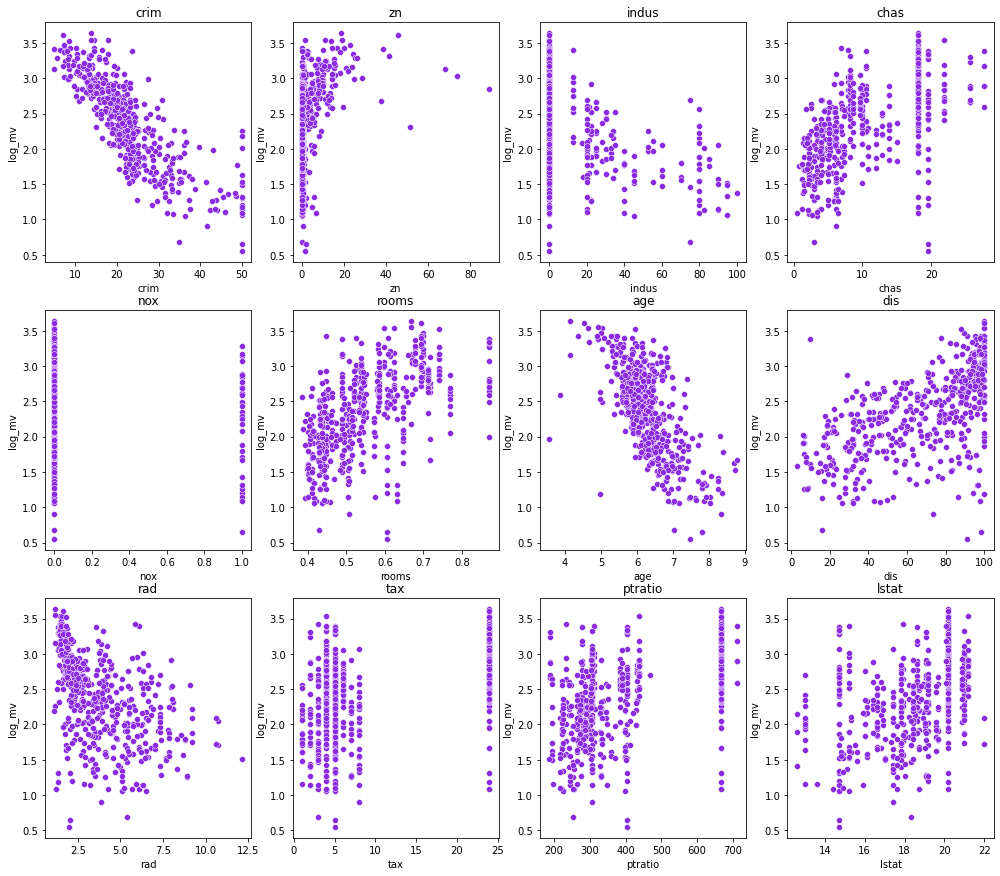

In [ ]:
f, axes = plt.subplots(nrows=3,ncols=4,figsize=(17,15))

a0 = sns.scatterplot(x='crim', y='log_mv',ax=axes[0,0],color = 'blueviolet',data=df)
a0.set_title('crim')
a1 = sns.scatterplot(x='zn', y='log_mv',ax=axes[0,1],color = 'blueviolet',data=df)
a1.set_title('zn')
a2 = sns.scatterplot(x='indus', y='log_mv',ax=axes[0,2],color = 'blueviolet',data=df)
a2.set_title('indus')
a3 = sns.scatterplot(x='chas', y='log_mv',ax=axes[0,3],color = 'blueviolet',data=df)
a3.set_title('chas')
a4 = sns.scatterplot(x='nox', y='log_mv',ax=axes[1,0],color = 'blueviolet',data=df)
a4.set_title('nox')
a5 = sns.scatterplot(x='rooms', y='log_mv',ax=axes[1,1],color = 'blueviolet',data=df)
a5.set_title('rooms')
a6 = sns.scatterplot(x='age', y='log_mv',ax=axes[1,2],color = 'blueviolet',data=df)
a6.set_title('age')
a7 = sns.scatterplot(x='dis', y='log_mv',ax=axes[1,3],color = 'blueviolet',data=df)
a7.set_title('dis')
a8 = sns.scatterplot(x='rad', y='log_mv',ax=axes[2,0],color = 'blueviolet',data=df)
a8.set_title('rad')
a9 = sns.scatterplot(x='tax', y='log_mv',ax=axes[2,1],color = 'blueviolet',data=df)
a9.set_title('tax')
a10 = sns.scatterplot(x='ptratio', y='log_mv',ax=axes[2,2],color = 'blueviolet',data=df)
a10.set_title('ptratio')
a11 = sns.scatterplot(x='lstat', y='log_mv',ax=axes[2,3],color = 'blueviolet',data=df)
a11.set_title('lstat')

In [ ]:
# Create the train, test data based on 70-30 split of the data
# Use all the explanatory variables with exception of neighborhood

explainatoryVar = ["crim","zn","indus","chas","nox","rooms","age","dis","rad","tax","ptratio","lstat"]
responseVar = ["mv"]

X = df[explainatoryVar]
y = df[responseVar]

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3, shuffle=True, random_state=RANDOM_SEED)

folds = KFold(n_splits = 10, shuffle = True, random_state = RANDOM_SEED)

overall_results_tbl = pd.DataFrame(columns=['model_name','avg_rmse_score_over_10folds'])

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(354, 12) (354, 1)
(152, 12) (152, 1)


**Models to predict mv**

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    1.0s finished


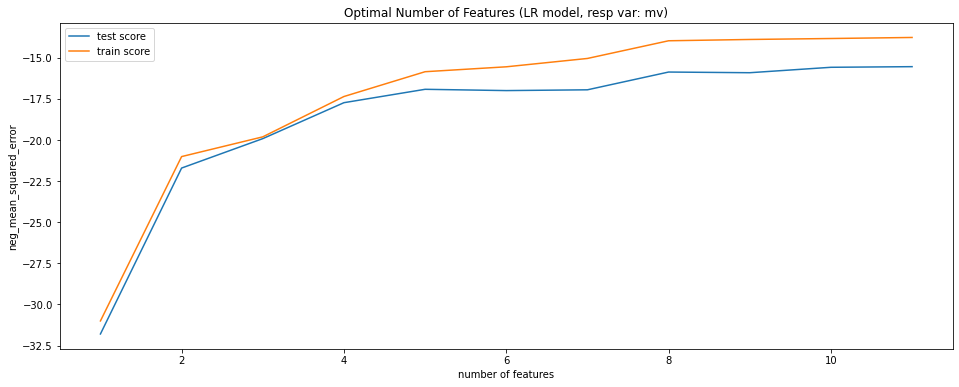

In [ ]:
############################################
#  Linear Regression  - Response var: mv   #
###########################################

# using cross validation design
lin_reg = LinearRegression()

hyper_params = [{'n_features_to_select': list(range(1, 12))}]
rfe = RFE(lin_reg)  

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train.values.ravel())  

cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('neg_mean_squared_error')
plt.title("Optimal Number of Features (LR model, resp var: mv)")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
# print the best estimator details
print("Optimal number of features : %d" % model_cv.best_estimator_.n_features_)
features=list(X.columns[model_cv.best_estimator_.support_])
print(features)
print('ranking of features:')
model_cv.best_estimator_.ranking_

Optimal number of features : 11
['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad', 'tax', 'lstat']
ranking of features:


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [ ]:
print('Accuracy - Linear Regression Model (Training Data + resp var: mv):', model_cv.best_estimator_.score(X_train,y_train))
print('Accuracy - Linear Regression Model (Test Data + + resp var: mv):', model_cv.best_estimator_.score(X_test,y_test))

Accuracy - Linear Regression Model (Training Data + resp var: mv): 0.7190597970645962
Accuracy - Linear Regression Model (Test Data + + resp var: mv): 0.7072229813357155


In [ ]:
#use the best model to compute RMSE using CV design
lin_reg = model_cv.best_estimator_ ## Best LR model
print('Best Linear Regression model (response var: mv): ')
print(lin_reg)

Best Linear Regression model (response var: mv): 
RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=11, step=1, verbose=0)


In [ ]:
print('RMSE values using best linear regression model (Response var: mv) (10-folds): ')
lin_reg_scores  = cross_val_score(lin_reg, X, y.values.ravel(), scoring=('neg_mean_squared_error'), cv=folds)
lin_rmse_scores = np.sqrt(-lin_reg_scores)
lin_rmse_scores


RMSE values using best linear regression model (Response var: mv) (10-folds): 


array([3.51570259, 4.42973706, 4.02166197, 4.13882575, 4.08293792,
       4.5535118 , 3.02771482, 3.18255925, 4.38440954, 3.61015247])

In [ ]:
mean_score = lin_rmse_scores.mean()
print ('Linear Regression - Average RMSE Scores using 10-folds: ',mean_score)
overall_results_tbl = overall_results_tbl.append({'model_name':'Linear Regression (Resp var: mv)', 'avg_rmse_score_over_10folds':mean_score},ignore_index=True)

Linear Regression - Average RMSE Scores using 10-folds:  3.8947213165220598


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.9s finished


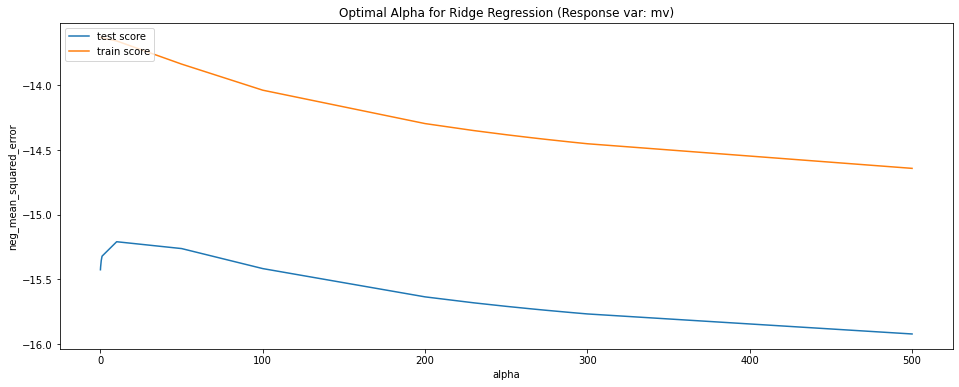

In [ ]:
##############################################
#  Ridge Regression -- Response Variable: mv #
#############################################

hyper_params = [{'alpha': [0, 0.1, 0.5, 1,10,50,100,200, 230, 250,265, 270, 275, 290, 300, 500]}]
rr_model = Ridge() 

model_cv = GridSearchCV(estimator = rr_model, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('neg_mean_squared_error')
plt.title("Optimal Alpha for Ridge Regression (Response var: mv)")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
print('Accuracy - Ridge Regression Model (Training Data + resp var: mv):', model_cv.best_estimator_.score(X_train,y_train))
print('Accuracy - Ridge Regression Model (Test Data + resp var: mv):', model_cv.best_estimator_.score(X_test,y_test))

Accuracy - Ridge Regression Model (Training Data + resp var: mv): 0.7213894018363423
Accuracy - Ridge Regression Model (Test Data + resp var: mv): 0.7084431544760417


In [ ]:
ridge_reg = model_cv.best_estimator_ ## Best Ridge model 
print('Best Ridge model (response var: mv): ')
print(ridge_reg)
print('Best Ridge model (intercept_): ')
print(ridge_reg.intercept_)
print('Best Ridge model (coef_): ')
print(ridge_reg.coef_)

Best Ridge model (response var: mv): 
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Best Ridge model (intercept_): 
[33.71798528]
Best Ridge model (coef_): 
[[-0.33583645  0.04124094  0.02082962  0.09436947 -0.34969234  0.05429658
  -1.99234613  0.07235682 -0.28086283  0.18423106 -0.00660441 -0.29926405]]


In [ ]:
print('RMSE values using best Ridge Regression model (Response var: mv): ')
ridge_reg_scores  = cross_val_score(ridge_reg, X, y, scoring=('neg_mean_squared_error'), cv=folds)
ridge_rmse_scores = np.sqrt(-ridge_reg_scores)
ridge_rmse_scores

RMSE values using best Ridge Regression model (Response var: mv): 


array([3.50489636, 4.45898782, 4.00010931, 4.07380518, 4.08810551,
       4.44196693, 2.98555958, 3.13017717, 4.38273079, 3.59618814])

In [ ]:
mean_score = ridge_rmse_scores.mean()
print ('Ridge Regression - Average RMSE Scores using 10-folds: ',mean_score)
overall_results_tbl = overall_results_tbl.append({'model_name':'Ridge Regression (Resp var: mv)', 'avg_rmse_score_over_10folds':mean_score},ignore_index=True)


Ridge Regression - Average RMSE Scores using 10-folds:  3.866252677819282


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


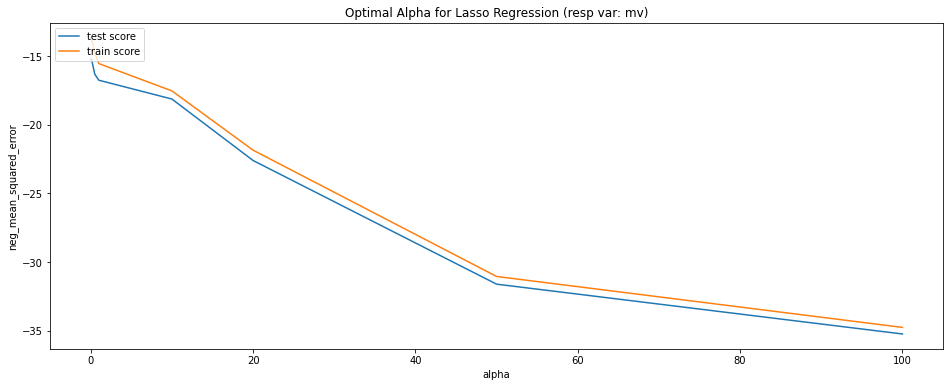

In [ ]:
#############################################
#  Lasso Regression -- Response Variable: mv #
#############################################

hyper_params = [{'alpha': [0.01,0.02, 0.024, 0.025, 0.026, 0.03,0.05,0.1,0.5,1.0,10,20,50,100]}]
model = Lasso() 

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('neg_mean_squared_error')
plt.title("Optimal Alpha for Lasso Regression (resp var: mv)")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
print('Accuracy - Lasso Regression Model (Training Data + resp var: mv ):', model_cv.best_estimator_.score(X_train,y_train))
print('Accuracy - Lasso Regression Model (Test Data + resp var: mv):', model_cv.best_estimator_.score(X_test,y_test))

Accuracy - Lasso Regression Model (Training Data + resp var: mv ): 0.7211003407197482
Accuracy - Lasso Regression Model (Test Data + resp var: mv): 0.7096068367408217


In [ ]:
lasso_reg = model_cv.best_estimator_
print('Best Lasso model (response var: mv): ')
print(lasso_reg)
print('Best Lasso model (intercept_): ')
print(lasso_reg.intercept_)
print('Best Lasso model (coef_): ')
print(lasso_reg.coef_)

Best Lasso model (response var: mv): 
Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Best Lasso model (intercept_): 
[33.36613293]
Best Lasso model (coef_): 
[-0.33354717  0.04254169  0.01968843  0.08984769 -0.          0.
 -2.01928302  0.07336584 -0.25169043  0.17607921 -0.00609575 -0.28700499]


In [ ]:
print('RMSE values using best Lasso Regression model (Response var: mv)(10-folds): ')
#use the best model to compute RMSE using CV design
lasso_reg_scores  = cross_val_score(lasso_reg, X, y, scoring=('neg_mean_squared_error'), cv=folds)
lasso_rmse_scores = np.sqrt(-lasso_reg_scores)
lasso_rmse_scores


RMSE values using best Lasso Regression model (Response var: mv)(10-folds): 


array([3.50771326, 4.42369456, 4.00084832, 4.03933092, 4.09747427,
       4.42797128, 2.97036014, 3.12877173, 4.39726477, 3.60730393])

In [ ]:
mean_score = lasso_rmse_scores.mean()
print ('Lasso Regression - Average RMSE Scores using 10-folds: ',mean_score)
overall_results_tbl = overall_results_tbl.append({'model_name':'Lasso Regression (Resp var: mv)', 'avg_rmse_score_over_10folds':mean_score},ignore_index=True)

Lasso Regression - Average RMSE Scores using 10-folds:  3.8600733170954262


In [ ]:
######################################################
#  Random Forest Regression -- Response Variable: mv #
######################################################

param_grid = { 
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
}
model = RandomForestRegressor(bootstrap=True) 

model_cv = GridSearchCV(estimator = model, 
                        param_grid = param_grid, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train.values.ravel())  


Fitting 10 folds for each of 132 candidates, totalling 1320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1320 out of 1320 | elapsed:  5.0min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verb

In [ ]:
print('Accuracy - Random Forest Regression Model (Training Data + resp var: mv ):', model_cv.best_estimator_.score(X_train,y_train))
print('Accuracy - Random Forest Regression Model (Test Data + resp var: mv):', model_cv.best_estimator_.score(X_test,y_test))

Accuracy - Random Forest Regression Model (Training Data + resp var: mv ): 0.9485659691533181
Accuracy - Random Forest Regression Model (Test Data + resp var: mv): 0.7719017429858284


In [ ]:
randomforest_reg = model_cv.best_estimator_
print('Best Random Forest Regression model (response var: mv): ')
print(randomforest_reg)
print('Feature importances: ')
print(randomforest_reg.feature_importances_)
print ('n_estimators')
print (randomforest_reg.n_estimators)
print ('max_depth: ')
print (randomforest_reg.max_depth)
print ('min_samples_leaf: ')
print (randomforest_reg.min_samples_leaf)
print ('max_features: ')
print (randomforest_reg.max_features)

Best Random Forest Regression model (response var: mv): 
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Feature importances: 
[0.24830495 0.08652701 0.00860117 0.14051584 0.00805263 0.07491878
 0.14662957 0.14593861 0.09164884 0.00869611 0.0281809  0.0119856 ]
n_estimators
80
max_depth: 
8
min_samples_leaf: 
1
max_features: 
sqrt


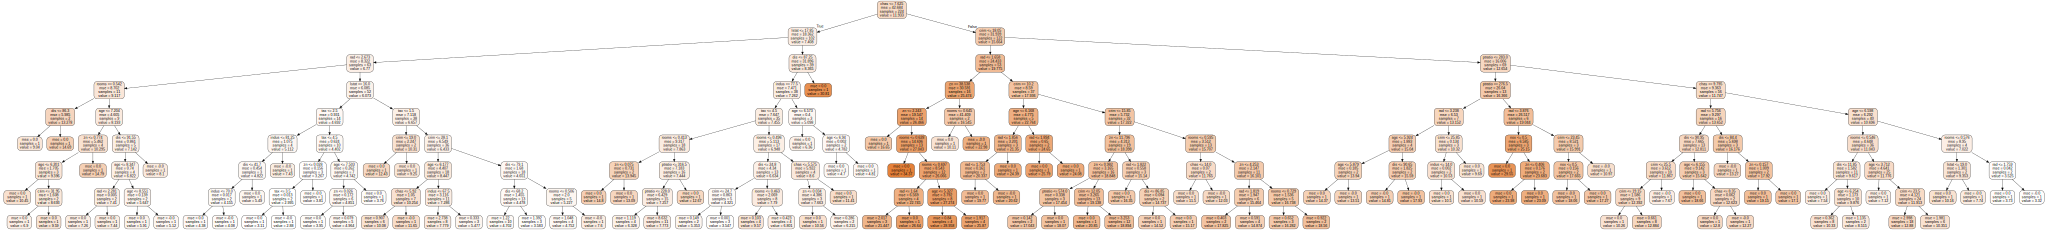

In [ ]:
boston_features_list = ['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'lstat']

randomforest_tree = randomforest_reg.estimators_[10]

export_graphviz(randomforest_tree, out_file="randomforesttree.dot",feature_names=boston_features_list,rounded=True, filled=True)

with open("randomforesttree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [ ]:

(graph,) = pydot.graph_from_dot_file('randomforesttree.dot')
graph.write_png('gdrive/My Drive/Colab Notebooks/Assignment4-project2/randomforesttree.png')

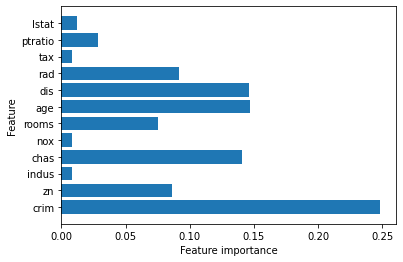

In [ ]:
def plot_feature_importances_boston(model):
    n_features = len(boston_features_list)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), boston_features_list)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_boston(randomforest_reg)

In [ ]:
print('RMSE values using best Random Forest Regression model (Response var: mv)(10-folds): ')
#use the best model to compute RMSE using CV design
randomforest_reg_scores  = cross_val_score(randomforest_reg, X, y.values.ravel(), scoring=('neg_mean_squared_error'), cv=folds)
randomforest_rmse_scores = np.sqrt(-randomforest_reg_scores)
randomforest_rmse_scores


RMSE values using best Random Forest Regression model (Response var: mv)(10-folds): 


array([3.12263497, 3.4080126 , 3.57661431, 3.38049441, 3.56033921,
       3.54716661, 2.34325755, 2.31177934, 3.96489294, 2.92376843])

In [ ]:
mean_score = randomforest_rmse_scores.mean()
print ('Random Forest Regression - Average RMSE Scores using 10-folds: ',mean_score)
overall_results_tbl = overall_results_tbl.append({'model_name':'Random Forest Regression (Resp var: mv)', 'avg_rmse_score_over_10folds':mean_score},ignore_index=True)

Random Forest Regression - Average RMSE Scores using 10-folds:  3.2138960368652647


In [ ]:
##########################################################
#  Gradient Boosting Regression -- Response Variable: mv #
##########################################################

param_grid = { 
    'n_estimators': [80,100,150],
    'learning_rate': [0.01, 0.02,0.05, 0.1,0.5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
}

model = GradientBoostingRegressor() 

model_cv = GridSearchCV(estimator = model, 
                        param_grid = param_grid, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train.values.ravel())  


Fitting 10 folds for each of 495 candidates, totalling 4950 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4950 out of 4950 | elapsed:  8.8min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weig...
                                                 subsample=1.0, tol=0.0001,
                                     

In [ ]:
print('Accuracy - Gradient Boosting Regression Model (Training Data + resp var: mv ):', model_cv.best_estimator_.score(X_train,y_train))
print('Accuracy -  Gradient Boosting Regression Model (Test Data + resp var: mv):', model_cv.best_estimator_.score(X_test,y_test))

Accuracy - Gradient Boosting Regression Model (Training Data + resp var: mv ): 0.9924734883564392
Accuracy -  Gradient Boosting Regression Model (Test Data + resp var: mv): 0.7688787966813813


In [ ]:
gradientboost_reg = model_cv.best_estimator_
print('Best Gradient Boosting Regression model (response var: mv): ')
print(gradientboost_reg)
print('Feature importances: ')
print(gradientboost_reg.feature_importances_)
print ('n_estimators')
print (gradientboost_reg.n_estimators)
print ('max_depth: ')
print (gradientboost_reg.max_depth)
print ('min_samples_leaf: ')
print (gradientboost_reg.min_samples_leaf)
print ('max_features: ')
print (gradientboost_reg.max_features)

Best Gradient Boosting Regression model (response var: mv): 
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=6,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Feature importances: 
[0.32125319 0.08088761 0.00925981 0.11823576 0.00595169 0.07521905
 0.13571246 0.14515719 0.07566654 0.00995364 0.01235713 0.01034592]
n_estimators
100
max_depth: 
6
min_samples_leaf: 
1
max_features: 
log2


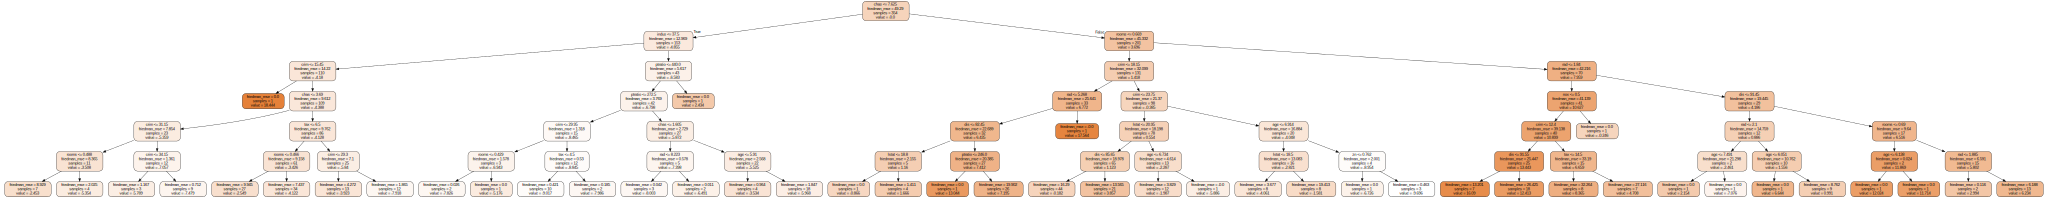

In [ ]:
gbrt_tree = gradientboost_reg.estimators_[0][0]

export_graphviz(gbrt_tree, out_file="gbrttree.dot",feature_names=boston_features_list,rounded=True, filled=True)

with open("gbrttree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:

(graph,) = pydot.graph_from_dot_file('gbrttree.dot')
graph.write_png('gdrive/My Drive/Colab Notebooks/Assignment4-project2/gbrttree.png')

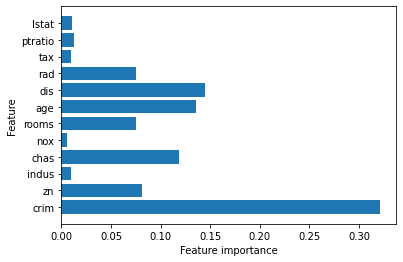

In [ ]:
plot_feature_importances_boston(gradientboost_reg)

In [ ]:
print('RMSE values using best Gradient Boosting Regression model (Response var: mv)(10-folds): ')
#use the best model to compute RMSE using CV design
gbrt_reg_scores  = cross_val_score(gradientboost_reg, X, y.values.ravel(), scoring=('neg_mean_squared_error'), cv=folds)
gbrt_rmse_scores = np.sqrt(-gbrt_reg_scores )
gbrt_rmse_scores

RMSE values using best Gradient Boosting Regression model (Response var: mv)(10-folds): 


array([3.0238335 , 2.98669589, 3.48993811, 3.2285103 , 3.52524555,
       3.61892162, 2.10046251, 2.35025539, 3.81871546, 2.77526018])

In [ ]:
mean_score = gbrt_rmse_scores.mean()
print ('Gradient Boosting Regression - Average RMSE Scores using 10-folds: ',mean_score)
overall_results_tbl = overall_results_tbl.append({'model_name':'Gradient Boosting Regression (Resp var: mv)', 'avg_rmse_score_over_10folds':mean_score},ignore_index=True)

Gradient Boosting Regression - Average RMSE Scores using 10-folds:  3.091783851026862


In [ ]:
overall_results_tbl

,model_name,avg_rmse_score_over_10folds
0,Linear Regression (Resp var: mv),3.894721
1,Ridge Regression (Resp var: mv),3.866253
2,Lasso Regression (Resp var: mv),3.860073
3,Random Forest Regression (Resp var: mv),3.213896
4,Gradient Boosting Regression (Resp var: mv),3.091784


**Models to predict log mv**

In [ ]:
########################################################################################
############                Response variable: log(mv)                         #########
########################################################################################

In [ ]:
explainatoryVar = ["crim","zn","indus","chas","nox","rooms","age","dis","rad","tax","ptratio","lstat"]
responseVar = ["log_mv"]

X = df[explainatoryVar]
# response variable is log median value of homes in thousands of 1970 dollars
y = df[responseVar]

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.03, random_state=RANDOM_SEED)

folds = KFold(n_splits = 10, shuffle = True, random_state = RANDOM_SEED)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(354, 12) (354, 1)
(16, 12) (16, 1)


Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d ar

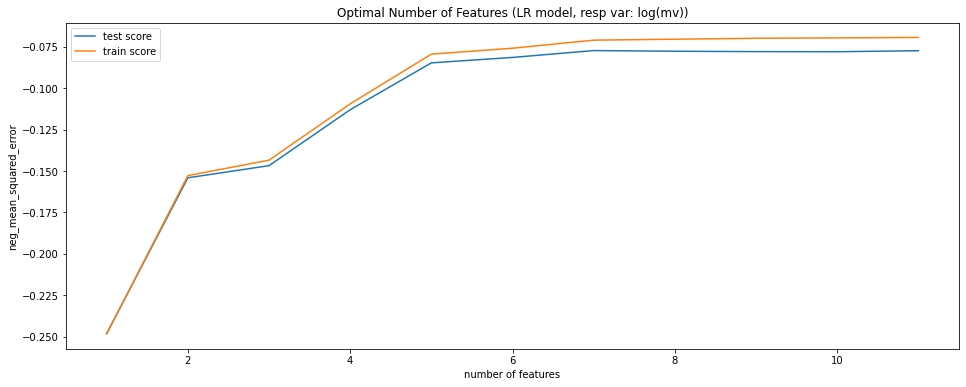

In [ ]:
################################################
#  Linear Regression  - Response var: log(mv)  #
################################################

# using cross validation design
lin_reg_logmv = LinearRegression()

hyper_params = [{'n_features_to_select': list(range(1, 12))}]
rfe = RFE(lin_reg_logmv)  

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('neg_mean_squared_error')
plt.title("Optimal Number of Features (LR model, resp var: log(mv))")
plt.legend(['test score', 'train score'], loc='upper left')


In [ ]:
print("Optimal number of features : %d" % model_cv.best_estimator_.n_features_)
features=list(X.columns[model_cv.best_estimator_.support_])
print(features)
print('ranking of features:')
model_cv.best_estimator_.ranking_

Optimal number of features : 7
['crim', 'nox', 'rooms', 'age', 'dis', 'rad', 'lstat']
ranking of features:


array([1, 5, 4, 3, 1, 1, 1, 1, 1, 2, 6, 1])

In [ ]:
print('Accuracy - Linear Regression Model (Training Data + resp var: log(mv)):', model_cv.best_estimator_.score(X_train,y_train))
print('Accuracy - Linear Regression Model (Test Data + resp var: log(mv)):', model_cv.best_estimator_.score(X_test,y_test))

Accuracy - Linear Regression Model (Training Data + resp var: log(mv)): 0.8034529021614599
Accuracy - Linear Regression Model (Test Data + resp var: log(mv)): 0.8339627015887157


In [ ]:
lin_reg_logmv = model_cv.best_estimator_ ## Best LR model
print('Best Linear Regression model (response var: log(mv)): ')
print(lin_reg_logmv)

Best Linear Regression model (response var: log(mv)): 
RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=7, step=1, verbose=0)


In [ ]:
print('RMSE values using best linear regression model (Response var: log(mv)): ')
#use the best model to compute RMSE using CV design
lin_reg_logmv = model_cv.best_estimator_ ## Best LR model

#Compute the RMSE scores using cross-validation design -- linear regression with log(mv)
lin_reg_logmv_scores  = cross_val_score(rfe, X, y.values.ravel(), scoring=('neg_mean_squared_error'), cv=folds)
lin_logmv_rmse_scores = np.sqrt(-lin_reg_logmv_scores)
lin_logmv_rmse_scores

RMSE values using best linear regression model (Response var: log(mv)): 


array([0.23939842, 0.26858008, 0.32222311, 0.29473965, 0.30362428,
       0.36099901, 0.26633022, 0.27155211, 0.28952618, 0.29927892])

In [ ]:
mean_score = lin_logmv_rmse_scores.mean()
print ('Linear Regression (response: log(mv)) - Average RMSE Scores using 10-folds: ',mean_score)
overall_results_tbl = overall_results_tbl.append({'model_name':'Linear Regression (Resp var: log(mv))', 'avg_rmse_score_over_10folds':mean_score},ignore_index=True)


Linear Regression (response: log(mv)) - Average RMSE Scores using 10-folds:  0.29162519662823855


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.1s finished


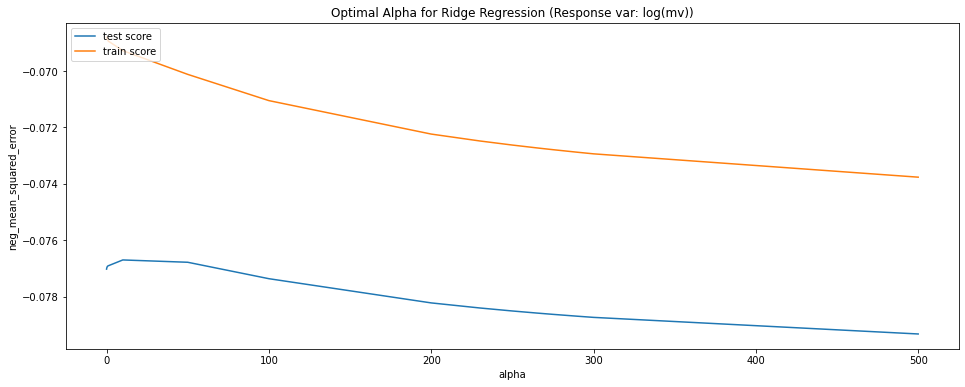

In [ ]:
###################################################
#  Ridge Regression -- Response Variable: log(mv) #
##################################################

hyper_params = [{'alpha': [0, 0.1, 0.5, 1,10,50,100,200, 230, 250,265, 270, 275, 290, 300, 500]}]
rr_model_logmv = Ridge() 

model_cv = GridSearchCV(estimator = rr_model_logmv, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('neg_mean_squared_error')
plt.title("Optimal Alpha for Ridge Regression (Response var: log(mv))")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
print('Accuracy - Ridge Regression Model (Training Data + resp var: log(mv)):', model_cv.best_estimator_.score(X_train,y_train))
print('Accuracy - Ridge Regression Model (Test Data + resp var: log(mv)):', model_cv.best_estimator_.score(X_test,y_test))

Accuracy - Ridge Regression Model (Training Data + resp var: log(mv)): 0.8083350612402243
Accuracy - Ridge Regression Model (Test Data + resp var: log(mv)): 0.8382294682322262


In [ ]:
ridge_reg_logmv = model_cv.best_estimator_ ## Best Ridge model 
print('Best Ridge model (response var: log(mv)): ')
print(ridge_reg_logmv)
print('Best Ridge model (intercept_): ')
print(ridge_reg_logmv.intercept_)
print('Best Ridge model (coef_): ')
print(ridge_reg_logmv.coef_)


Best Ridge model (response var: log(mv)): 
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Best Ridge model (intercept_): 
[4.0655296]
Best Ridge model (coef_): 
[[-0.03956326 -0.00111216 -0.00141005  0.00462809  0.00062446 -0.03635266
  -0.13589718  0.00563108 -0.00846834  0.00981977 -0.00038185 -0.01384671]]


In [ ]:
print('RMSE values using best Ridge Regression model (Response var: log(mv)): ')
ridge_reg_logmv_scores  = cross_val_score(ridge_reg_logmv, X, y, scoring=('neg_mean_squared_error'), cv=folds)
ridge_logmv_rmse_scores = np.sqrt(-ridge_reg_logmv_scores)
ridge_logmv_rmse_scores

RMSE values using best Ridge Regression model (Response var: log(mv)): 


array([0.23328408, 0.2718716 , 0.29397888, 0.26403402, 0.31052928,
       0.31493938, 0.24517956, 0.2416084 , 0.28430636, 0.29542643])

In [ ]:
mean_score = ridge_logmv_rmse_scores.mean()
print ('Ridge Regression (response: log(mv)) - Average RMSE Scores using 10-folds: ',mean_score)
overall_results_tbl = overall_results_tbl.append({'model_name':'Ridge Regression (Resp var: log(mv))', 'avg_rmse_score_over_10folds':mean_score},ignore_index=True)


Ridge Regression (response: log(mv)) - Average RMSE Scores using 10-folds:  0.27551579802625


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


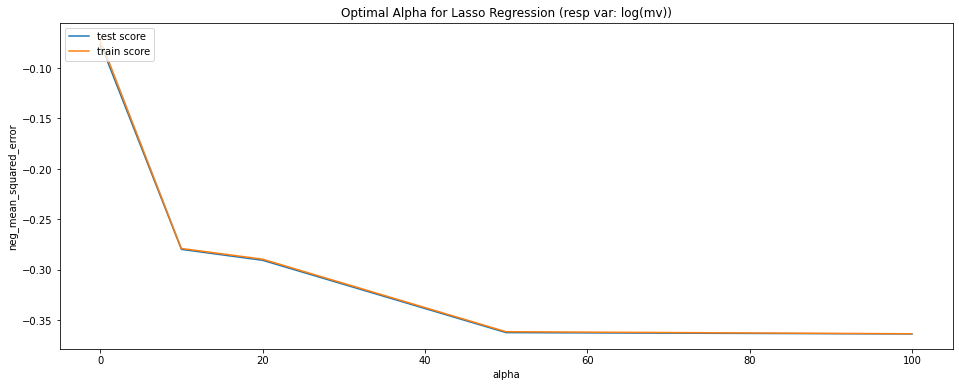

In [ ]:
###################################################
#  Lasso Regression -- Response Variable: log(mv) #
##################################################


hyper_params = [{'alpha': [0.01,0.02, 0.024, 0.025, 0.026, 0.03,0.05,0.1,0.5,1.0,10,20,50,100]}]
model_logmv = Lasso() 

model_cv = GridSearchCV(estimator = model_logmv, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('neg_mean_squared_error')
plt.title("Optimal Alpha for Lasso Regression (resp var: log(mv))")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
print('Accuracy - Lasso Regression Model (Training Data + log(mv)):', model_cv.best_estimator_.score(X_train,y_train))
print('Accuracy - Lasso Regression Model (Test Data + log(mv)):', model_cv.best_estimator_.score(X_test,y_test))

Accuracy - Lasso Regression Model (Training Data + log(mv)): 0.8069700466279018
Accuracy - Lasso Regression Model (Test Data + log(mv)): 0.841310036194063


In [ ]:
lasso_reg_logmv = model_cv.best_estimator_
print('Best Lasso model (response var: log(mv)): ')
print(lasso_reg_logmv)
print('Best Lasso model (intercept_): ')
print(lasso_reg_logmv.intercept_)
print('Best Lasso model (coef_): ')
print(lasso_reg_logmv.coef_)

Best Lasso model (response var: log(mv)): 
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Best Lasso model (intercept_): 
[3.78682703]
Best Lasso model (coef_): 
[-0.03973267 -0.00030241 -0.00161847  0.00511359  0.         -0.
 -0.1145096   0.00575862 -0.00116235  0.0080121  -0.00032256 -0.00955813]


In [ ]:
print('RMSE values using best Lasso Regression model (Response var: log(mv)): ')
#use the best model to compute RMSE using CV design
lasso_reg_logmv = model_cv.best_estimator_ ## Best Ridge model

lasso_reg_logmv_scores  = cross_val_score(lasso_reg_logmv, X, y, scoring=('neg_mean_squared_error'), cv=folds)
lasso_logmv_rmse_scores = np.sqrt(-lasso_reg_logmv_scores)
lasso_logmv_rmse_scores

RMSE values using best Lasso Regression model (Response var: log(mv)): 


array([0.23423489, 0.26785365, 0.29073652, 0.25837505, 0.31319444,
       0.30752106, 0.24793178, 0.24424735, 0.29122716, 0.29770642])

In [ ]:
mean_score = lasso_logmv_rmse_scores.mean()
print ('Lasso Regression (response: log(mv))- Average RMSE Scores using 10-folds: ',mean_score)
overall_results_tbl = overall_results_tbl.append({'model_name':'Lasso Regression (Resp var: log(mv))', 'avg_rmse_score_over_10folds':mean_score},ignore_index=True)


Lasso Regression (response: log(mv))- Average RMSE Scores using 10-folds:  0.27530283285289814


In [ ]:

###########################################################
#  Random Forest Regression -- Response Variable: log(mv) #
###########################################################

param_grid = { 
    'n_estimators': [80,100,150,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
}
model_logmv = RandomForestRegressor(bootstrap=True) 

model_cv = GridSearchCV(estimator = model_logmv, 
                        param_grid = param_grid, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train.values.ravel())  

Fitting 10 folds for each of 132 candidates, totalling 1320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1320 out of 1320 | elapsed:  5.0min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verb

In [ ]:

print('Accuracy - Random Forest Regression Model (Training Data + resp var: log(mv) ):', model_cv.best_estimator_.score(X_train,y_train))
print('Accuracy - Random Forest Regression Model (Test Data + resp var: log(mv)):', model_cv.best_estimator_.score(X_test,y_test))


Accuracy - Random Forest Regression Model (Training Data + resp var: log(mv) ): 0.972044828535577
Accuracy - Random Forest Regression Model (Test Data + resp var: log(mv)): 0.846051773373561


In [ ]:
randomforest_reg_logmv = model_cv.best_estimator_
print('Best Random Forest Regression model (response var: log(mv)): ')
print(randomforest_reg_logmv)
print('Feature importances: ')
print(randomforest_reg_logmv.feature_importances_)
print ('n_estimators')
print (randomforest_reg_logmv.n_estimators)
print ('max_depth: ')
print (randomforest_reg_logmv.max_depth)
print ('min_samples_leaf: ')
print (randomforest_reg_logmv.min_samples_leaf)
print ('max_features: ')
print (randomforest_reg_logmv.max_features)

Best Random Forest Regression model (response var: log(mv)): 
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Feature importances: 
[0.3527073  0.06939839 0.02625411 0.09318884 0.00588743 0.0647422
 0.17233555 0.09799816 0.05587409 0.00870499 0.02740728 0.02550167]
n_estimators
80
max_depth: 
12
min_samples_leaf: 
1
max_features: 
log2


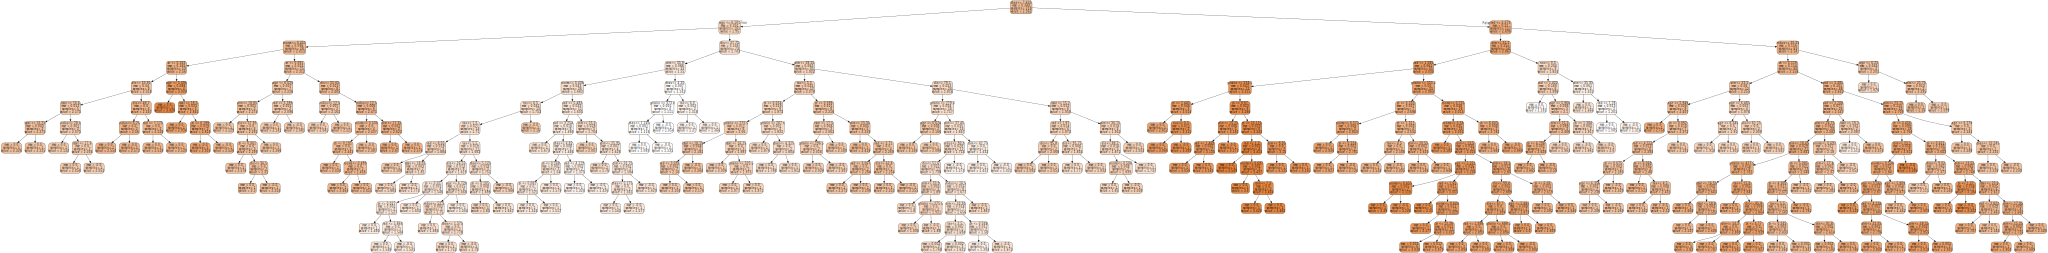

In [ ]:
randomforest_tree_logmv = randomforest_reg_logmv.estimators_[10]

export_graphviz(randomforest_tree_logmv, out_file="randomforesttree_logmv.dot",feature_names=boston_features_list,rounded=True, filled=True)

with open("randomforesttree_logmv.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
(graph,) = pydot.graph_from_dot_file('randomforesttree_logmv.dot')
graph.write_png('gdrive/My Drive/Colab Notebooks/Assignment4-project2/randomforesttree_logmv.png')

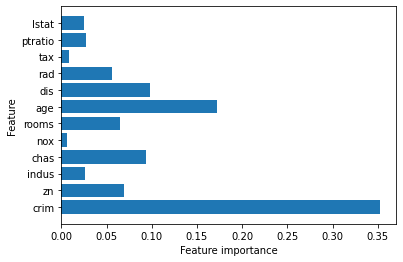

In [ ]:
plot_feature_importances_boston(randomforest_reg_logmv)

In [ ]:
print('RMSE values using best Random Forest Regression model (Response var: log(mv))(10-folds): ')
#use the best model to compute RMSE using CV design
randomforest_logmv_reg_scores  = cross_val_score(randomforest_reg_logmv, X, y.values.ravel(), scoring=('neg_mean_squared_error'), cv=folds)
randomforest_logmv_rmse_scores = np.sqrt(-randomforest_logmv_reg_scores)
randomforest_logmv_rmse_scores

RMSE values using best Random Forest Regression model (Response var: log(mv))(10-folds): 


array([0.22015144, 0.24106562, 0.28103942, 0.2617977 , 0.26598268,
       0.25331018, 0.22771747, 0.21855878, 0.28148461, 0.23818064])

In [ ]:
mean_score = randomforest_logmv_rmse_scores.mean()
print ('Random Forest Regression (response: log(mv)) - Average RMSE Scores using 10-folds: ',mean_score)
overall_results_tbl = overall_results_tbl.append({'model_name':'Random Forest Regression (Resp var: log(mv))', 'avg_rmse_score_over_10folds':mean_score},ignore_index=True)


Random Forest Regression (response: log(mv)) - Average RMSE Scores using 10-folds:  0.24892885556147828


In [ ]:
###############################################################
#  Gradient Boosting Regression -- Response Variable: log(mv) #
###############################################################

param_grid = { 
    'n_estimators': [80,100,150],
    'learning_rate': [0.01, 0.02,0.05, 0.1,0.5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
}

model_logmv = GradientBoostingRegressor() 

model_cv = GridSearchCV(estimator = model_logmv, 
                        param_grid = param_grid, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train.values.ravel())  

Fitting 10 folds for each of 495 candidates, totalling 4950 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4950 out of 4950 | elapsed:  8.5min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weig...
                                                 subsample=1.0, tol=0.0001,
                                     

In [ ]:

print('Accuracy - Gradient Boosting Regression Model (Training Data + resp var: log(mv) ):', model_cv.best_estimator_.score(X_train,y_train))
print('Accuracy -  Gradient Boosting Regression Model (Test Data + resp var: log(mv)):', model_cv.best_estimator_.score(X_test,y_test))

Accuracy - Gradient Boosting Regression Model (Training Data + resp var: log(mv) ): 0.9685362039949045
Accuracy -  Gradient Boosting Regression Model (Test Data + resp var: log(mv)): 0.8200033913060116


In [ ]:
gradientboost_reg_logmv = model_cv.best_estimator_
print('Best Gradient Boosting Regression model (response var: log(mv)): ')
print(gradientboost_reg_logmv)
print('Feature importances: ')
print(gradientboost_reg_logmv.feature_importances_)
print ('n_estimators')
print (gradientboost_reg_logmv.n_estimators)
print ('max_depth: ')
print (gradientboost_reg_logmv.max_depth)
print ('min_samples_leaf: ')
print (gradientboost_reg_logmv.min_samples_leaf)
print ('max_features: ')
print (gradientboost_reg_logmv.max_features)

Best Gradient Boosting Regression model (response var: log(mv)): 
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Feature importances: 
[0.38568966 0.0690758  0.00584264 0.15403199 0.00861344 0.03033673
 0.17218596 0.07753237 0.05189559 0.00566295 0.02014472 0.01898815]
n_estimators
150
max_depth: 
4
min_samples_leaf: 
1
max_features: 
sqrt


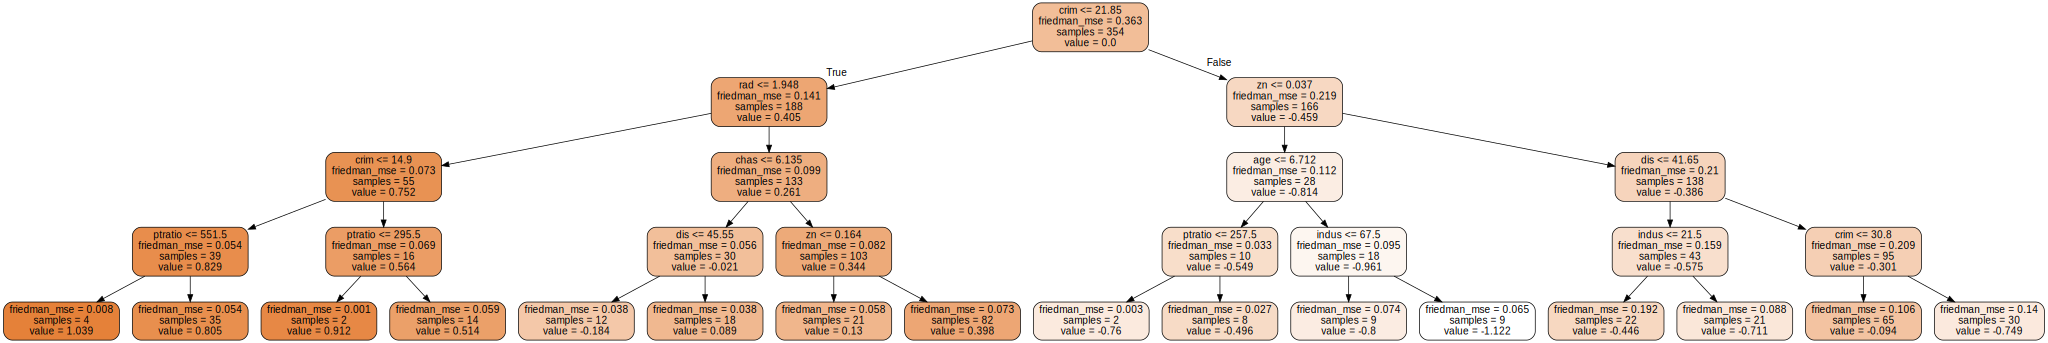

In [ ]:
gbrt_logmv_tree = gradientboost_reg_logmv.estimators_[0][0]

export_graphviz(gbrt_logmv_tree, out_file="gbrttree_logmv.dot",feature_names=boston_features_list,rounded=True, filled=True)

with open("gbrttree_logmv.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
(graph,) = pydot.graph_from_dot_file('gbrttree_logmv.dot')
graph.write_png('gdrive/My Drive/Colab Notebooks/Assignment4-project2/gbrttree_logmv.png')

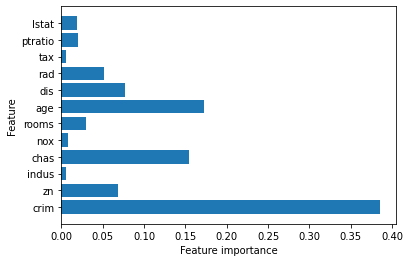

In [ ]:
plot_feature_importances_boston(gradientboost_reg_logmv)

In [ ]:
print('RMSE values using best Gradient Boosting Regression model (Response var: log(mv))(10-folds): ')
#use the best model to compute RMSE using CV design
gbrt_logmv_reg_scores  = cross_val_score(gradientboost_reg_logmv, X, y.values.ravel(), scoring=('neg_mean_squared_error'), cv=folds)
gbrt_logmv_rmse_scores = np.sqrt(-gbrt_logmv_reg_scores )
gbrt_logmv_rmse_scores


RMSE values using best Gradient Boosting Regression model (Response var: log(mv))(10-folds): 


array([0.21859694, 0.23097058, 0.2897929 , 0.22300291, 0.26396483,
       0.28185821, 0.19911066, 0.21454689, 0.2744778 , 0.23172869])

In [ ]:
mean_score = gbrt_logmv_rmse_scores.mean()
print ('Gradient Boosting Regression (response: log(mv))- Average RMSE Scores using 10-folds: ',mean_score)
overall_results_tbl = overall_results_tbl.append({'model_name':'Gradient Boosting Regression (Resp var: log(mv))', 'avg_rmse_score_over_10folds':mean_score},ignore_index=True)


Gradient Boosting Regression (response: log(mv))- Average RMSE Scores using 10-folds:  0.24280503961160727


In [ ]:
overall_results_tbl

,model_name,avg_rmse_score_over_10folds
0,Linear Regression (Resp var: mv),3.894721
1,Ridge Regression (Resp var: mv),3.866253
2,Lasso Regression (Resp var: mv),3.860073
3,Random Forest Regression (Resp var: mv),3.213896
4,Gradient Boosting Regression (Resp var: mv),3.091784
5,Linear Regression (Resp var: log(mv)),0.291625
6,Ridge Regression (Resp var: log(mv)),0.275516
7,Lasso Regression (Resp var: log(mv)),0.275303
8,Random Forest Regression (Resp var: log(mv)),0.248929
9,Gradient Boosting Regression (Resp var: log(mv)),0.242805
